# <font color='blue'>Data Science Academy - Big Data Real-Time Analytics com Python e Spark</font>
# <font color='blue'>Capítulo 3</font>

## Gráficos Estatísticos com Seaborn

In [1]:
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
%matplotlib inline

In [3]:
sns.__version__

'0.8.1'

In [4]:
# Datasets importados junto com o Seaborn
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [5]:
# Carregando um dataset
iris = sns.load_dataset("iris")

In [6]:
type(iris)

pandas.core.frame.DataFrame

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Construindo Gráficos Estatísticos

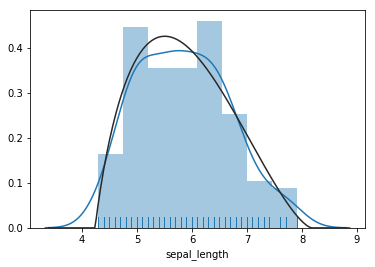

In [10]:
# Histograma com estimativa de densidade de kernel - Distribuição univariada
sns.distplot(iris.sepal_length, rug = True, fit = stats.gausshyper);

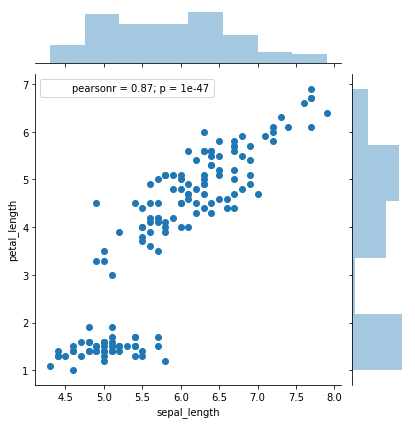

In [11]:
# Scatterplot - Distribuição bivariada
sns.jointplot(x = "sepal_length", y = "petal_length", data = iris);

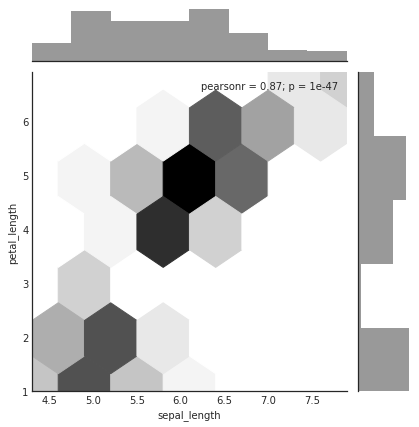

In [12]:
# Gráfico útil quando estiver trabalhando com grandes conjuntos de dados - Distribuição bivariada
with sns.axes_style("white"):
    sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "hex", color  ="k");

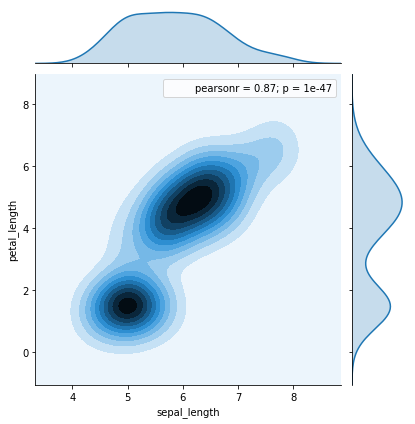

In [13]:
# Distribuição bivariada
sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "kde");

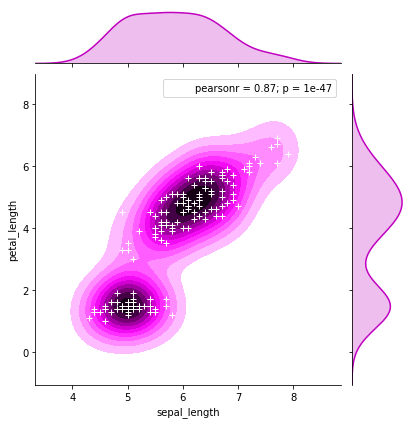

In [14]:
# Distribuição bivariada
g = sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

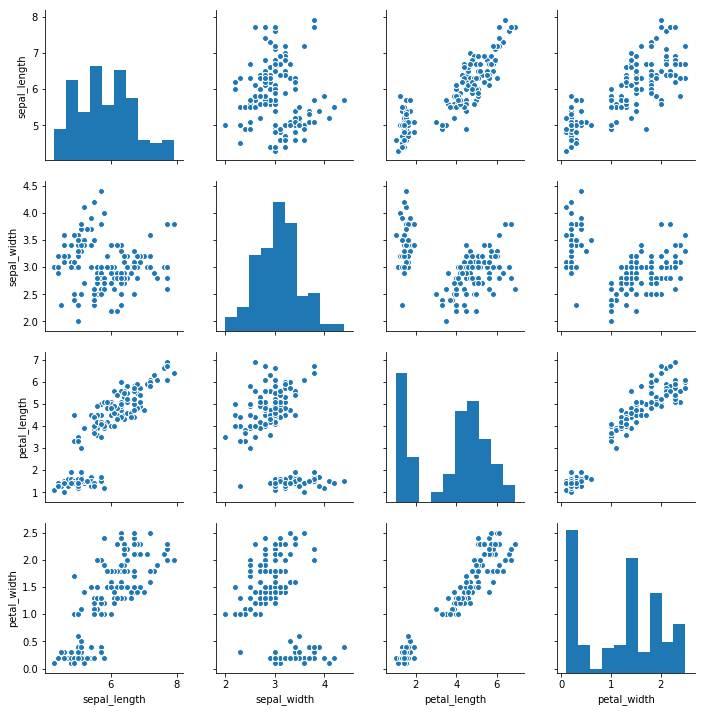

In [15]:
# Plot para distirbuições bi-variadas
sns.pairplot(iris);

## Visualização de Relacionamento Linear

In [16]:
# Carregando o dataset tips
tips = sns.load_dataset("tips")

In [17]:
type(tips)

pandas.core.frame.DataFrame

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


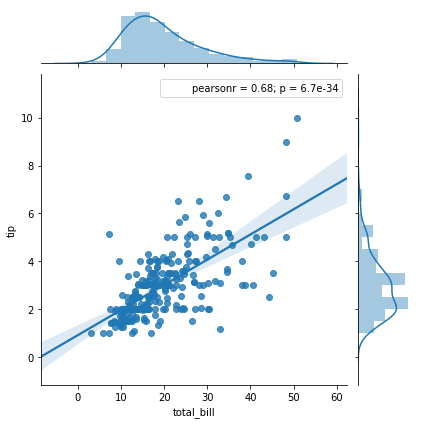

In [20]:
# Scatterplot com linha de regressão - Distribuição bivariada 
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg");

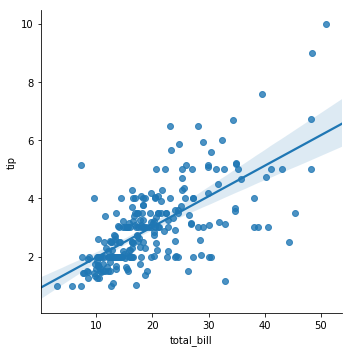

In [21]:
# Regressão Linear (utiliza 95% de intervalo de confiança por padrão)
# tip - variável dependente
# total_bill - variável independente
sns.lmplot(x = "total_bill", y = "tip", data = tips);

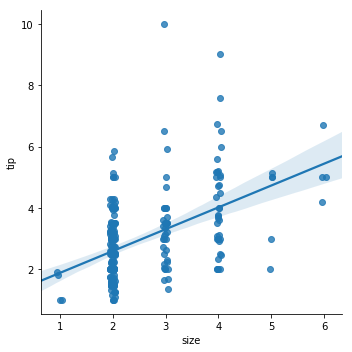

In [22]:
# Alterando a variável independente
sns.lmplot(x = "size", y = "tip", data = tips, x_jitter = .05);

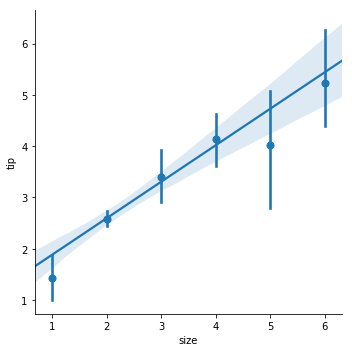

In [23]:
# Visualizando o efeito de diferentes tamanho de tips
sns.lmplot(x = "size", y = "tip", data = tips, x_estimator = np.mean);

In [24]:
# Carregando o dataset anscombe
anscombe = sns.load_dataset("anscombe")

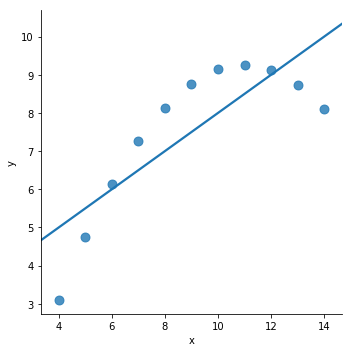

In [25]:
# Relacionamento não-linear
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = {"s": 80});

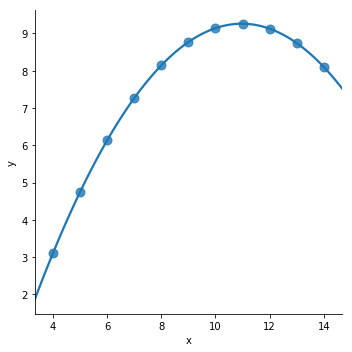

In [26]:
# Podemos ajustar os parâmetros para se adequarem a curva
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), order = 2, ci = None, scatter_kws = {"s": 80});

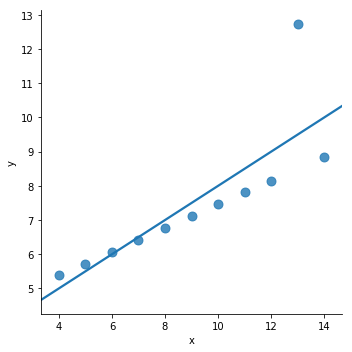

In [27]:
## Visualizando outliers
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"), ci = None, scatter_kws = {"s": 80});

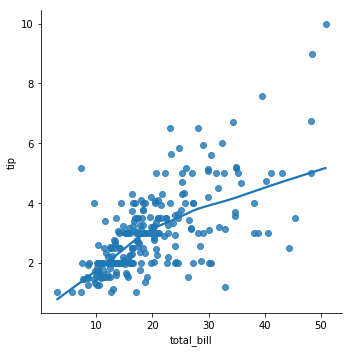

In [28]:
## Usando o lowess smoother para variáveis com relacionamento não linear.
sns.lmplot(x = "total_bill", y = "tip", data = tips, lowess = True);

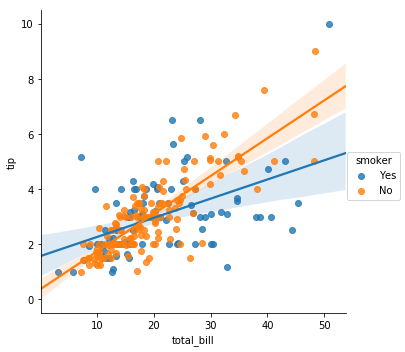

In [29]:
# Usando mais de 2 variáveis
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips);

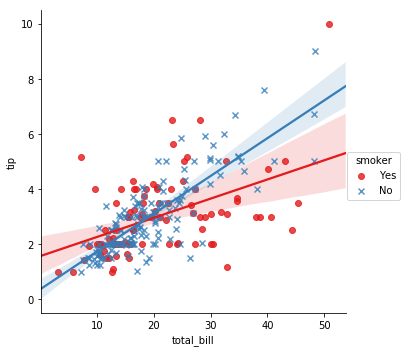

In [30]:
# Alterando a configuração do gráfico
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, markers = ["o", "x"], palette = "Set1");

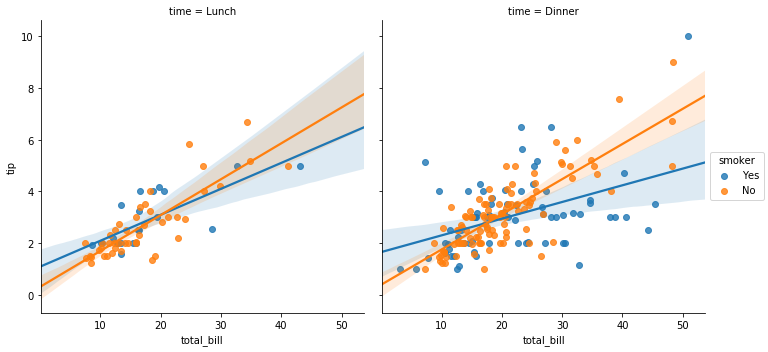

In [31]:
# Dividindo a área de desenho
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips);

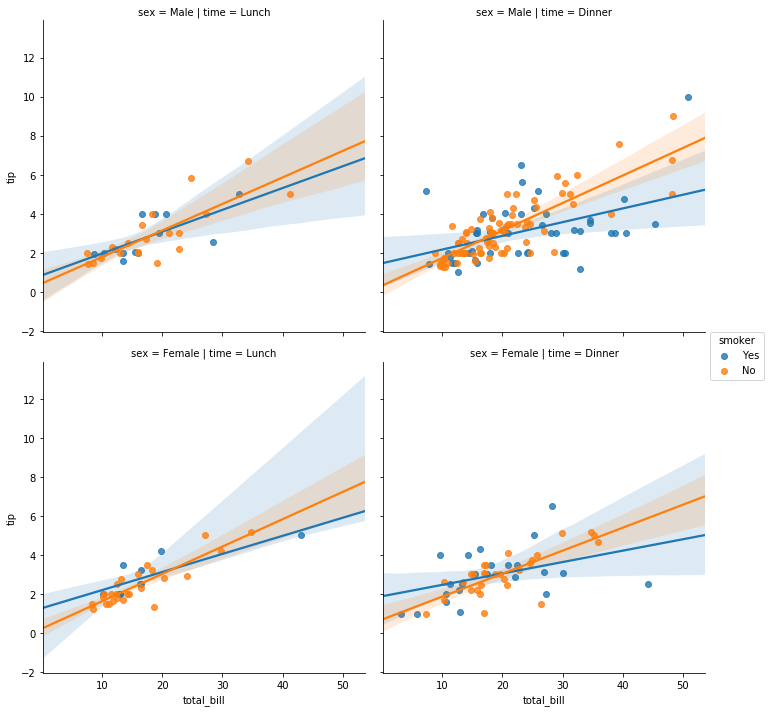

In [32]:
# Dividindo a área de desenho
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = tips);

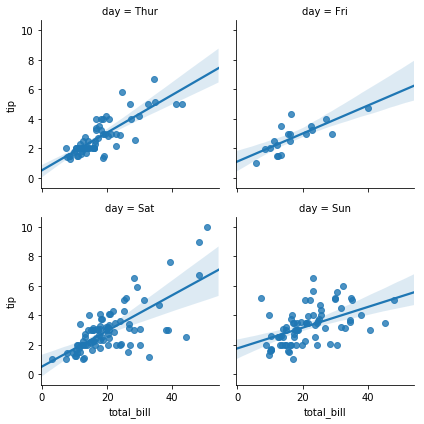

In [33]:
# Dividindo a área de desenho
sns.lmplot(x = "total_bill", y = "tip", col = "day", data = tips, col_wrap = 2, size = 3);

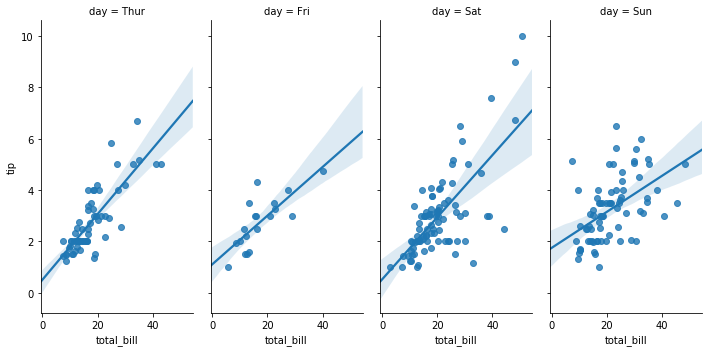

In [34]:
# Dividindo a área de desenho
sns.lmplot(x = "total_bill", y = "tip", col = "day", data = tips, aspect = .5);

## Gráficos para Variáveis Categóricas

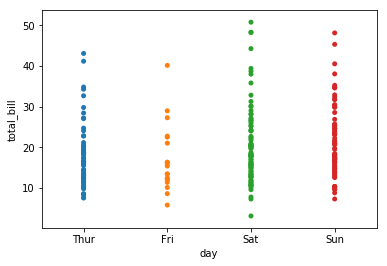

In [35]:
# stripplot
sns.stripplot(x = "day", y = "total_bill", data = tips);

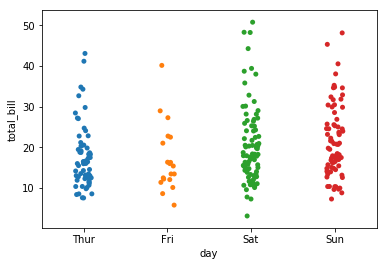

In [36]:
# stripplot
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

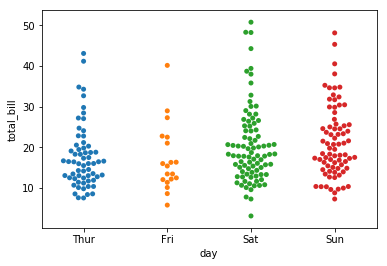

In [37]:
# swarmplot - Evitando overlap dos pontos
sns.swarmplot(x = "day", y = "total_bill", data = tips);

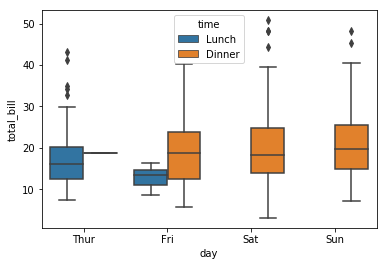

In [38]:
# boxplot
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

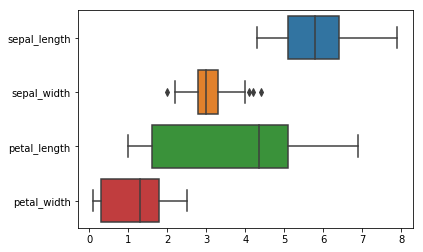

In [39]:
# boxplot
sns.boxplot(data = iris, orient = "h");

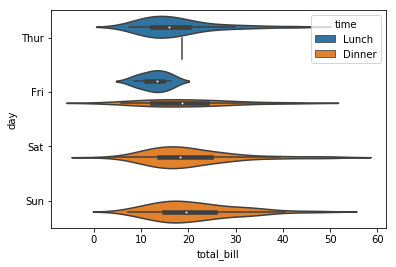

In [40]:
# violinplot
sns.violinplot(x = "total_bill", y = "day", hue = "time", data = tips);

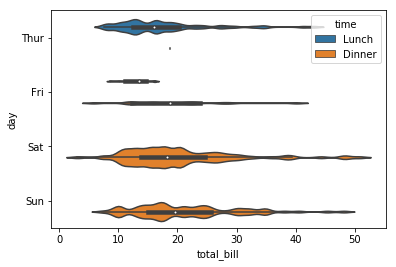

In [41]:
# violinplot
sns.violinplot(x = "total_bill", y = "day", hue = "time", data = tips, bw = .1, scale = "count", scale_hue = False);

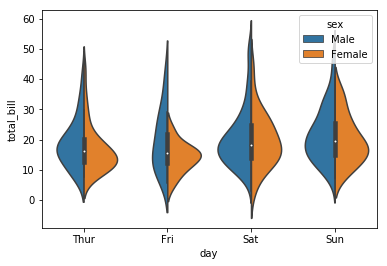

In [42]:
 # violinplot
sns.violinplot(x = "day", y = "total_bill", hue = "sex", data = tips, split = True);

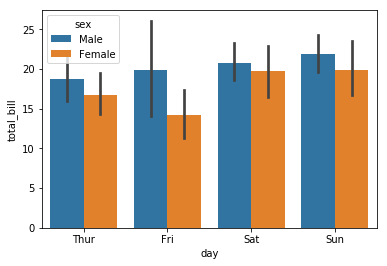

In [43]:
# barplot
sns.barplot(x = "day", y = "total_bill", hue = "sex", data = tips);

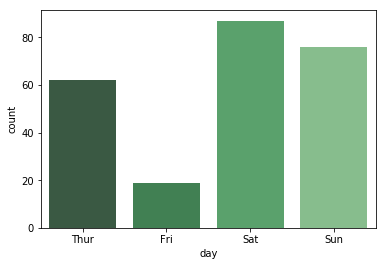

In [44]:
# countplot
sns.countplot(x = "day", data = tips, palette = "Greens_d");

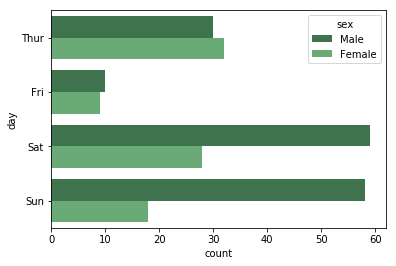

In [45]:
# countplot
sns.countplot(y = "day", hue = "sex", data = tips, palette = "Greens_d");

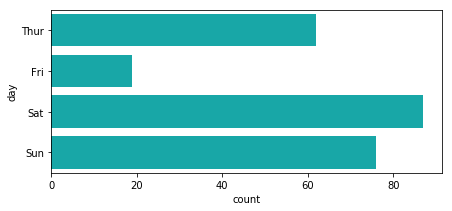

In [46]:
# countplot
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y = "day", data = tips, color = "c");

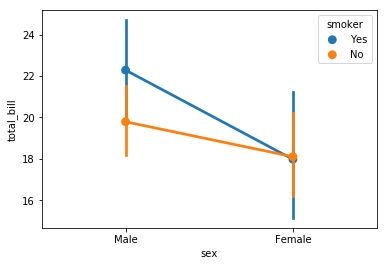

In [47]:
# pointplot
sns.pointplot(x = "sex", y = "total_bill", hue = "smoker", data = tips);

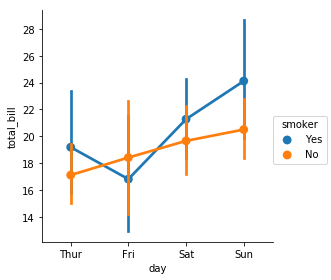

In [48]:
# factorplot
sns.factorplot(x = "day", y = "total_bill", hue = "smoker", data = tips);

## Visualizando DataFrames Pandas com Seaborn

In [49]:
import random
import pandas as pd

In [50]:
df = pd.DataFrame()

In [51]:
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [52]:
df.head()

,x,y
0,64,10
1,52,22
2,27,6
3,79,39
4,15,14


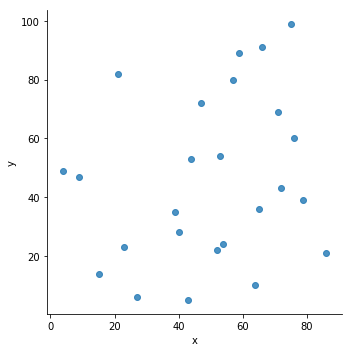

In [53]:
# Scatterplot
sns.lmplot('x', 'y', data = df, fit_reg = False)

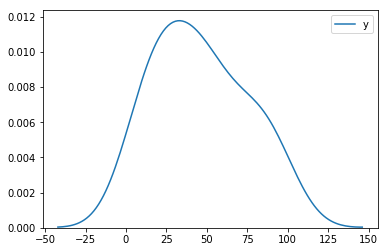

In [54]:
# Density Plot
sns.kdeplot(df.y)

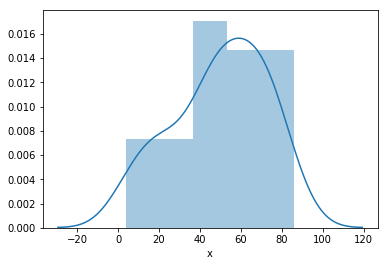

In [55]:
# Distplot
sns.distplot(df.x)

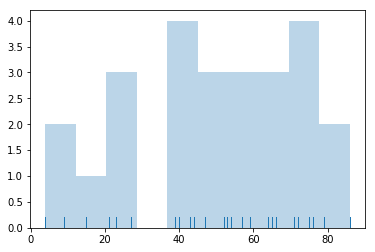

In [56]:
# Histograma
plt.hist(df.x, alpha = .3)
sns.rugplot(df.x);

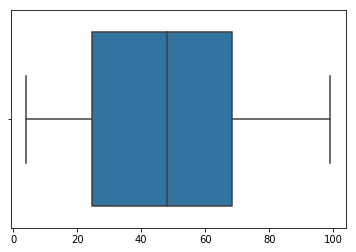

In [57]:
# Boxplot
sns.boxplot([df.y, df.x])

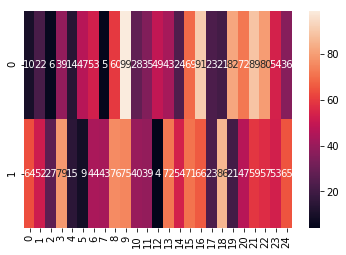

In [58]:
# Heatmap
sns.heatmap([df.y, df.x], annot = True, fmt = "d")

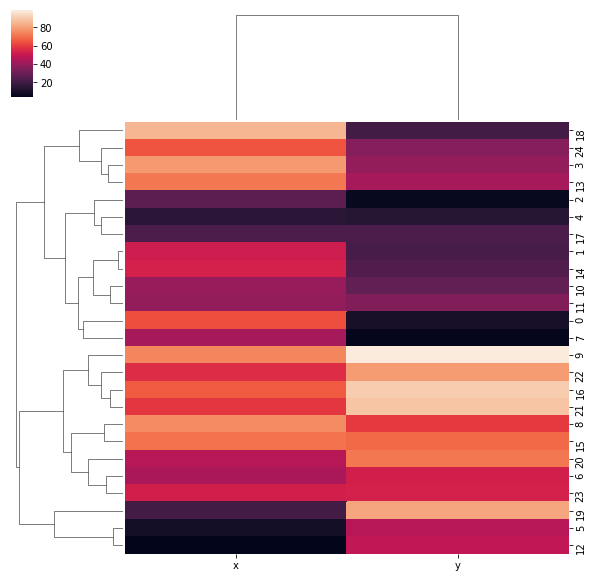

In [59]:
# Clustermap
sns.clustermap(df)

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>